In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Carregando dados
df = pd.read_csv("/workspaces/house-price-prediction/data/raw/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: xlabel='SalePrice', ylabel='Count'>

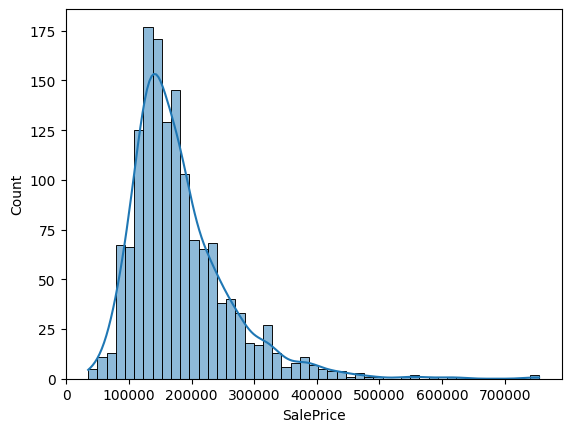

In [5]:
df.info()
df.describe()

# Verificando valores
missing = df.isnull().sum()
print(missing[missing > 0])

# Gráfico da variável alvo
sns.histplot(df['SalePrice'], kde=True)

In [ ]:
nulos_por_coluna = df.isnull().sum()

nulos_por_coluna = nulos_por_coluna.sort_values(ascending=False)

print(nulos_por_coluna)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64


In [7]:
# Remover colunas com muitos nulos
df = df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

# Preencher nulos com média ou moda
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

# Remover colunas categóricas para modelo simples
df_model = df.select_dtypes(include=['int64', 'float64'])

# Remover colunas com muitos outliers ou identificação
df_model = df_model.drop(['Id'], axis=1)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

X = df_model.drop("SalePrice", axis=1)
y = df_model["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando valores ausentes após a separação dos dados
print("X_train missing values:\n", X_train.isnull().sum().sum())
print("X_test missing values:\n", X_test.isnull().sum().sum())
print("y_train missing values:\n", y_train.isnull().sum())
print("y_test missing values:\n", y_test.isnull().sum())


# # Verificando valores ausentes após a separação dos dados
# print("X_train missing values:\n", X_train.isnull().sum().sum())
# print("X_test missing values:\n", X_test.isnull().sum().sum())
# print("y_train missing values:\n", y_train.isnull().sum())
# print("y_test missing values:\n", y_test.isnull().sum())


# X_train = X_train.dropna()
# y_train = y_train.loc[X_train.index]

# print(len(X_train))

# model = LinearRegression()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# print("MAE:", mean_absolute_error(y_test, y_pred))
# print("R²:", r2_score(y_test, y_pred))

X_train missing values:
 70
X_test missing values:
 19
y_train missing values:
 0
y_test missing values:
 0
